# Features in bureau

In [1]:
### set up system path to access helpers functions

import sys
import os

# Get the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the 'src' folder to sys.path
if src_path not in sys.path:
  sys.path.append(src_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helpers import *

In [3]:
# import files

df = pd.read_csv('../data/bureau.csv')
df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

# EDA of each feature

1. How useful is it
2. If useful, how to impute

### 1. SK_BUREAU_ID

In [5]:
# one client can have multiple credit records
# get an idea of how many each client can have by using groupby to group by SK_ID_CURR

bureau_engineered = pd.DataFrame(df.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()).reset_index()
bureau_engineered.columns = ['SK_ID_CURR', 'num_bureau_records']
bureau_engineered

,SK_ID_CURR,num_bureau_records
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


### New Feature #1. num_bureau_records

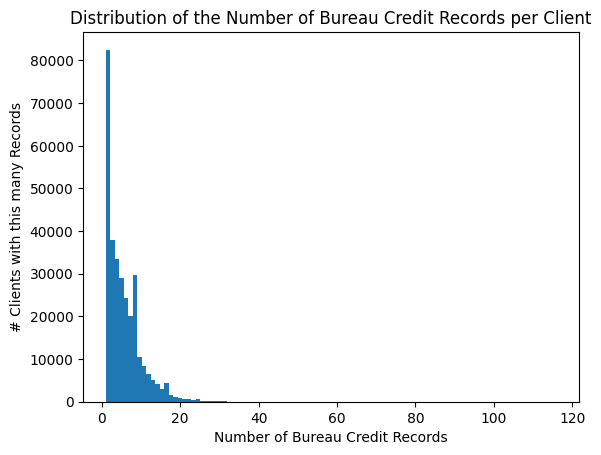

In [6]:
# check the distribution of records per client

plt.hist(bureau_engineered['num_bureau_records'], bins=100)
plt.title('Distribution of the Number of Bureau Credit Records per Client')
plt.xlabel('Number of Bureau Credit Records')
plt.ylabel('# Clients with this many Records');

In [7]:
# Check the number of outliers

check_outliers(bureau_engineered, 'num_bureau_records', iqr_multiplier=3)

The original dataframe contains 305811 observations.
Using IQR * 3, 750 outliers were detected.
If removed, 0.25% of the data will be dropped.


- While some clients have no records, others have a lot, there are a number of outliers
- Can consider including in model, but effectiveness is uncertain because:
  1. Strong skew, too many outliers
  2. Number of credit records may not indicate credit worthiness

### 2. CREDIT_ACTIVE

In [8]:
# check the values in CREDIT_ACTIVE

df['CREDIT_ACTIVE'].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

### New Feature #2. num_active_bureau_credits

In [9]:
# get a count of how many active ones there are per client

bureau_num_active_credits = pd.DataFrame(df[df['CREDIT_ACTIVE']=='Active'].groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count()).reset_index()
bureau_num_active_credits.columns = ['SK_ID_CURR','num_active_bureau_credits']

# add new feature to existing dataframe of engineered features

bureau_engineered = pd.merge(bureau_engineered, bureau_num_active_credits, on='SK_ID_CURR', how='outer')

# fill in NaN with 0, because it means they have no active credits with the Credit Bureau

bureau_engineered['num_active_bureau_credits'] = bureau_engineered['num_active_bureau_credits'].fillna(0)
bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits
0,100001,7,3.0
1,100002,8,2.0
2,100003,4,1.0
3,100004,2,0.0
4,100005,3,2.0
...,...,...,...
305806,456249,13,2.0
305807,456250,3,2.0
305808,456253,4,2.0
305809,456254,1,0.0


In [10]:
# count how many clients have at least 1 active credit

(bureau_engineered['num_active_bureau_credits'] > 0).sum() / df.shape[0]

np.float64(0.14670874630336955)

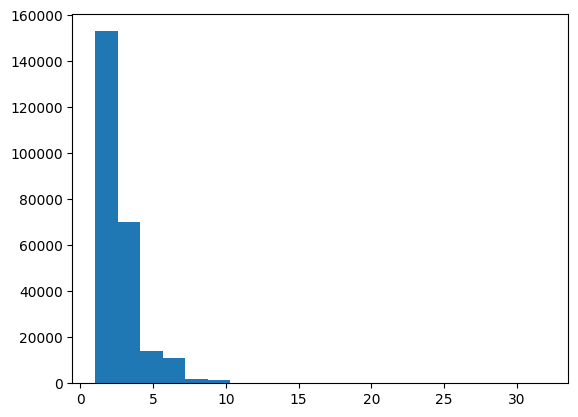

In [11]:
# plot the distribution

plt.hist(bureau_num_active_credits['num_active_bureau_credits'], bins=20);

### New feature #3: num_closed_bureau_credits

In [12]:
# get a count of how many closed ones there are per client

bureau_num_closed_credits = pd.DataFrame(df[df['CREDIT_ACTIVE']=='Closed'].groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count()).reset_index()
bureau_num_closed_credits.columns = ['SK_ID_CURR','num_closed_bureau_credits']

# add new feature to existing dataframe of engineered features

bureau_engineered = pd.merge(bureau_engineered, bureau_num_closed_credits, on='SK_ID_CURR', how='outer')

# fill in NaN with 0, because it means they have no closed credits with the Credit Bureau

bureau_engineered['num_closed_bureau_credits'] = bureau_engineered['num_closed_bureau_credits'].fillna(0)
bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits
0,100001,7,3.0,4.0
1,100002,8,2.0,6.0
2,100003,4,1.0,3.0
3,100004,2,0.0,2.0
4,100005,3,2.0,1.0
...,...,...,...,...
305806,456249,13,2.0,11.0
305807,456250,3,2.0,1.0
305808,456253,4,2.0,2.0
305809,456254,1,0.0,1.0


In [13]:
# count how many clients have at least 1 closed credit

(bureau_engineered['num_closed_bureau_credits'] > 0).sum() / df.shape[0]

np.float64(0.1560945172183162)

### New feature #4 num_bad_bureau_credits

In [14]:
# get a count of how many closed ones there are per client

bureau_num_bad_credits = pd.DataFrame(df[df['CREDIT_ACTIVE']=='Bad debt'].groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count()).reset_index()
bureau_num_bad_credits.columns = ['SK_ID_CURR','num_bad_bureau_credits']

# add new feature to existing dataframe of engineered features

bureau_engineered = pd.merge(bureau_engineered, bureau_num_bad_credits, on='SK_ID_CURR', how='outer')

# fill in NaN with 0, because it means they have no closed credits with the Credit Bureau

bureau_engineered['num_bad_bureau_credits'] = bureau_engineered['num_bad_bureau_credits'].fillna(0)
bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits
0,100001,7,3.0,4.0,0.0
1,100002,8,2.0,6.0,0.0
2,100003,4,1.0,3.0,0.0
3,100004,2,0.0,2.0,0.0
4,100005,3,2.0,1.0,0.0
...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0
305807,456250,3,2.0,1.0,0.0
305808,456253,4,2.0,2.0,0.0
305809,456254,1,0.0,1.0,0.0


In [15]:
# count how many clients have at least 1 bad credit

(bureau_engineered['num_bad_bureau_credits'] > 0).sum() / df.shape[0]

np.float64(1.2234710689874553e-05)

### New feature #5: num_sold_bureau_credit

In [16]:
# get a count of how many sold ones there are per client

bureau_num_sold_credits = pd.DataFrame(df[df['CREDIT_ACTIVE']=='Sold'].groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count()).reset_index()
bureau_num_sold_credits.columns = ['SK_ID_CURR','num_sold_bureau_credits']

# add new feature to existing dataframe of engineered features

bureau_engineered = pd.merge(bureau_engineered, bureau_num_sold_credits, on='SK_ID_CURR', how='outer')

# fill in NaN with 0, because it means they have no closed credits with the Credit Bureau

bureau_engineered['num_sold_bureau_credits'] = bureau_engineered['num_sold_bureau_credits'].fillna(0)
bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits
0,100001,7,3.0,4.0,0.0,0.0
1,100002,8,2.0,6.0,0.0,0.0
2,100003,4,1.0,3.0,0.0,0.0
3,100004,2,0.0,2.0,0.0,0.0
4,100005,3,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0
305807,456250,3,2.0,1.0,0.0,0.0
305808,456253,4,2.0,2.0,0.0,0.0
305809,456254,1,0.0,1.0,0.0,0.0


In [17]:
# count how many clients have at least 1 sold credit

(bureau_engineered['num_sold_bureau_credits'] > 0).sum() / df.shape[0]

np.float64(0.0035078663363683183)

### 3. CREDIT_CURRENCY

Recoded currency of the Credit Bureau credit

In [18]:
# check the values

df['CREDIT_CURRENCY'].value_counts() / df.shape[0]

CREDIT_CURRENCY
currency 1    0.999180
currency 2    0.000713
currency 3    0.000101
currency 4    0.000006
Name: count, dtype: float64

In [19]:
# low variability, drop feature

### 4. DAYS_CREDIT

How many days before current application did client apply for Credit Bureau credit

In [20]:
# check the values

df['DAYS_CREDIT'].value_counts()

DAYS_CREDIT
-364    1330
-336    1248
-273    1238
-357    1218
-343    1203
        ... 
-4       113
-3        74
-2        42
 0        25
-1        17
Name: count, Length: 2923, dtype: int64

In [21]:
# check for nulls

df['DAYS_CREDIT'].isna().sum()

np.int64(0)

In [22]:
# check the min and max

df['DAYS_CREDIT'].describe()

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64

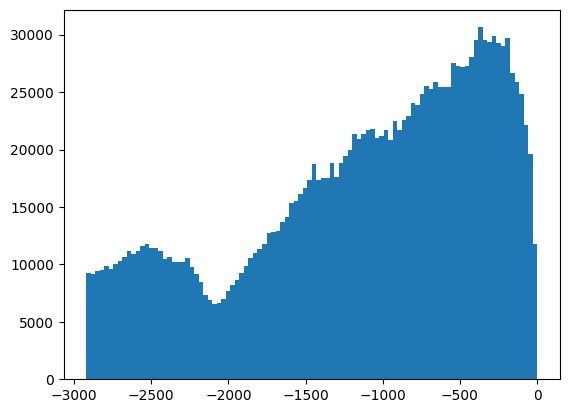

In [23]:
# check the distribution

plt.hist(df['DAYS_CREDIT'], bins=100);

- for each client, if they have multiple records, get the most recent one, get the max value of DAYS_CREDIT

### New feature #6. most_recent_bureau_apply

In [24]:
# save grouped by results into a dataframe and rename columns

bureau_most_recent_credit_apply = pd.DataFrame(df.groupby('SK_ID_CURR')['DAYS_CREDIT'].max()).reset_index()
bureau_most_recent_credit_apply.columns = ['SK_ID_CURR','most_recent_bureau_apply']

# add to engineered features dataframe
bureau_engineered = pd.merge(bureau_engineered, bureau_most_recent_credit_apply, on='SK_ID_CURR', how='outer')

# check for nulls
bureau_engineered.isna().sum()

SK_ID_CURR                   0
num_bureau_records           0
num_active_bureau_credits    0
num_closed_bureau_credits    0
num_bad_bureau_credits       0
num_sold_bureau_credits      0
most_recent_bureau_apply     0
dtype: int64

In [25]:
# check updated engineered features dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply
0,100001,7,3.0,4.0,0.0,0.0,-49
1,100002,8,2.0,6.0,0.0,0.0,-103
2,100003,4,1.0,3.0,0.0,0.0,-606
3,100004,2,0.0,2.0,0.0,0.0,-408
4,100005,3,2.0,1.0,0.0,0.0,-62
...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483
305807,456250,3,2.0,1.0,0.0,0.0,-760
305808,456253,4,2.0,2.0,0.0,0.0,-713
305809,456254,1,0.0,1.0,0.0,0.0,-1104


### 5. CREDIT_DAY_OVERDUE

Number of days past due on CB credit at the time of application for related loan in our sample

In [26]:
# check the values

df['CREDIT_DAY_OVERDUE'].value_counts()

CREDIT_DAY_OVERDUE
0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: count, Length: 942, dtype: int64

In [27]:
# how many had a value greater than 0

df[df['CREDIT_DAY_OVERDUE'] > 0]['SK_ID_CURR'].count() / df.shape[0]

np.float64(0.0024568464275809996)

- only 0.246% of the data in bureau had a value greater than 0
- since it is the overdue date, the longer date would be more indicative of their credit worthiness

### New feature #7. max_days_bureau_overdue

In [28]:
# save the greater of the credit day overdue

bureau_max_days_overdue = pd.DataFrame(df.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].max()).reset_index()
bureau_max_days_overdue.columns = ['SK_ID_CURR','max_days_bureau_overdue']

# add to the engineered features dataframe

bureau_engineered = pd.merge(bureau_engineered, bureau_max_days_overdue, on='SK_ID_CURR', how='outer')
bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue
0,100001,7,3.0,4.0,0.0,0.0,-49,0
1,100002,8,2.0,6.0,0.0,0.0,-103,0
2,100003,4,1.0,3.0,0.0,0.0,-606,0
3,100004,2,0.0,2.0,0.0,0.0,-408,0
4,100005,3,2.0,1.0,0.0,0.0,-62,0
...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0
305807,456250,3,2.0,1.0,0.0,0.0,-760,0
305808,456253,4,2.0,2.0,0.0,0.0,-713,0
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0


In [29]:
# check for nulls

bureau_engineered.isna().sum()

SK_ID_CURR                   0
num_bureau_records           0
num_active_bureau_credits    0
num_closed_bureau_credits    0
num_bad_bureau_credits       0
num_sold_bureau_credits      0
most_recent_bureau_apply     0
max_days_bureau_overdue      0
dtype: int64

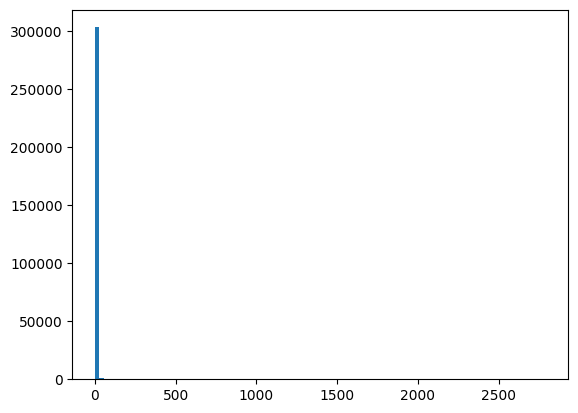

In [30]:
# check the distribution

plt.hist(bureau_engineered['max_days_bureau_overdue'],bins=100);

- data is very skewed, low variability, may not be a good feature

### 6. DAYS_CREDIT_ENDDATE

Remaining duration of CB credit (in days) at the time of application in Home Credit

<Axes: >

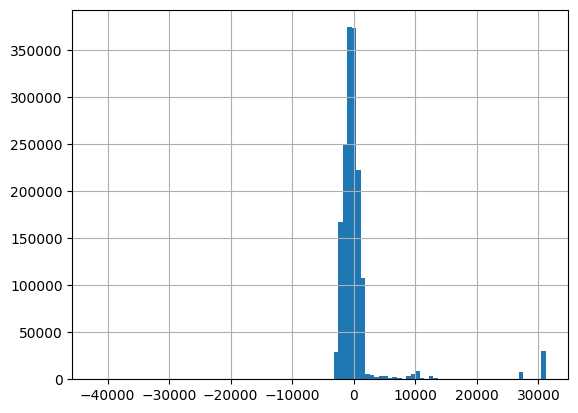

In [31]:
# check the distribution

df['DAYS_CREDIT_ENDDATE'].hist(bins=100)

- the average for all credits per client might be the most insightful

### New feature #8. avg_bureau_credit_enddate

In [32]:
# create a new feature to capture the average ENDDATE per client

avg_days_credit_enddate = pd.DataFrame(df.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].mean()).reset_index()
avg_days_credit_enddate.columns = ['SK_ID_CURR', 'avg_bureau_credit_enddate']

# add to engineered features dataframe
bureau_engineered = pd.merge(bureau_engineered, avg_days_credit_enddate, on='SK_ID_CURR', how='outer')

# fill nulls with 0
bureau_engineered['avg_bureau_credit_enddate'] = bureau_engineered['avg_bureau_credit_enddate'].fillna(0)

# check dataframe
bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333
...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000


In [33]:
# check for nulls
bureau_engineered.isna().sum()

SK_ID_CURR                   0
num_bureau_records           0
num_active_bureau_credits    0
num_closed_bureau_credits    0
num_bad_bureau_credits       0
num_sold_bureau_credits      0
most_recent_bureau_apply     0
max_days_bureau_overdue      0
avg_bureau_credit_enddate    0
dtype: int64

### 7. DAYS_ENDDATE_FACT

Days since CB credit ended at the time of application in Home Credit (only for closed credit)

<Axes: >

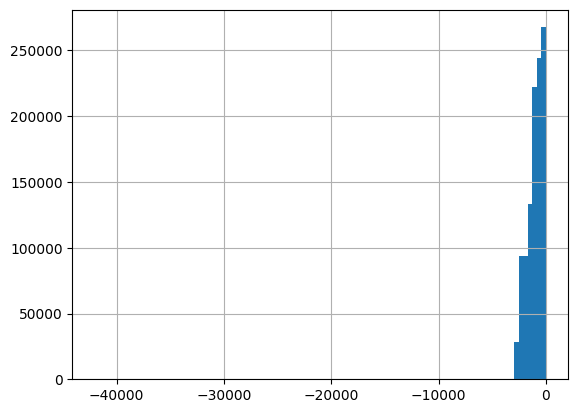

In [34]:
# check the value distribution

df['DAYS_ENDDATE_FACT'].hist(bins=100)

- the most recent enddate indicates how long ago they paid off a credit, but this could mean they either:
1. they haven't paid one off recently, because they have active loans or
2. they paid off a long time ago and haven't needed additional loans lately
- these 2 scenarios indicate opposite directions of credit worthiness, so may not be a clear indicator to the mode
- so drop feature

### 8. AMT_CREDIT_MAX_OVERDUE

Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

In [35]:
# check how many records have a value greater than 0

(df['AMT_CREDIT_MAX_OVERDUE'] > 0).sum() / df.shape[0]

np.float64(0.07066419331308975)

### New feature #9: max_bureau_overdue_amt

In [36]:
# get the highest max overdue per client and save to dataframe

max_overdue_max_amt = pd.DataFrame(df.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].max()).reset_index()
max_overdue_max_amt.columns = ['SK_ID_CURR', 'max_bureau_overdue_amt']

# add to existing engineered features dataframe

bureau_engineered = pd.merge(bureau_engineered, max_overdue_max_amt, on='SK_ID_CURR', how='outer')

# fill in null with 0, because NaN indicates no overdue amount

bureau_engineered['max_bureau_overdue_amt'] = bureau_engineered['max_bureau_overdue_amt'].fillna(0)

# check the updated dataframe

bureau_engineered


,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000
...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000


In [37]:
# check how many records have a value greater than 0

(bureau_engineered['max_bureau_overdue_amt'] > 0).sum() / bureau_engineered.shape[0]

np.float64(0.26258702270356526)

### 9. CNT_CREDIT_PROLONG

How many times was the Credit Bureau credit prolonged

<Axes: >

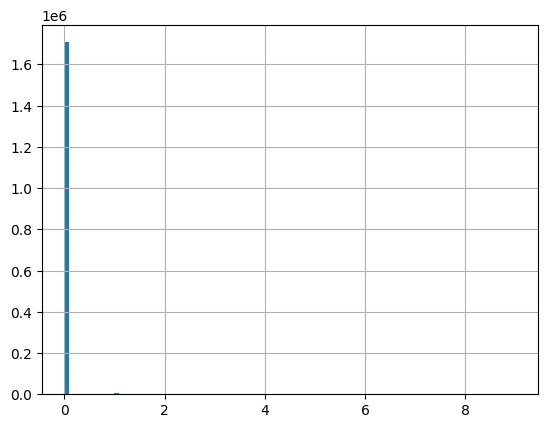

In [38]:
# check the values distribution

df['CNT_CREDIT_PROLONG'].hist(bins=100)

In [39]:
# check how many records have a value greater than 0

(df['CNT_CREDIT_PROLONG'] > 0).sum() / df.shape[0]

np.float64(0.005309864439405556)

- the sum of all records for a client will show how many total times the client has prolonged a credit

### New feature #10 ttl_cnt_bureau_prolong

In [40]:
# get the highest max overdue per client and save to dataframe

total_times_prolong = pd.DataFrame(df.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum()).reset_index()
total_times_prolong.columns = ['SK_ID_CURR', 'ttl_cnt_bureau_prolong']

# add to existing engineered features dataframe

bureau_engineered = pd.merge(bureau_engineered, total_times_prolong, on='SK_ID_CURR', how='outer')

# fill in null with 0, because NaN indicates never prolonged a credit

bureau_engineered['ttl_cnt_bureau_prolong'] = bureau_engineered['ttl_cnt_bureau_prolong'].fillna(0)

# check the updated dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000,0
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645,0
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000,0
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000,0
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000,0
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000,0
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000,0
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000,0


### 10. AMT_CREDIT_SUM

Current credit amount for the Credit Bureau credit

In [41]:
# check the value distribution

df['AMT_CREDIT_SUM'].describe()

count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
25%      5.130000e+04
50%      1.255185e+05
75%      3.150000e+05
max      5.850000e+08
Name: AMT_CREDIT_SUM, dtype: float64

- can be used in combination with AMT_CREDIT_SUM_DEBT to get the ratio of credit utilized

### 11. AMT_CREDIT_SUM_DEBT

Current debt on Credit Bureau credit

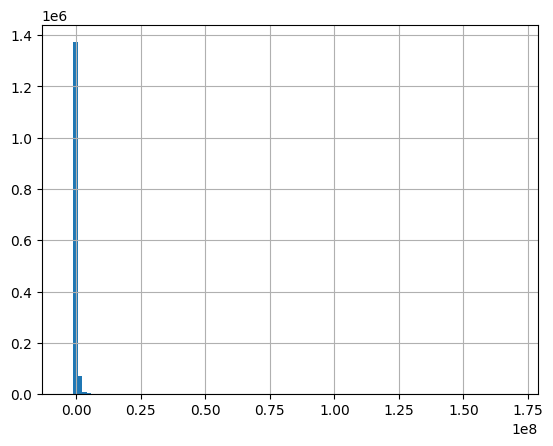

In [42]:
# check the distribution

df['AMT_CREDIT_SUM_DEBT'].hist(bins=100);

In [43]:
# check min & max

df['AMT_CREDIT_SUM_DEBT'].describe()

count    1.458759e+06
mean     1.370851e+05
std      6.774011e+05
min     -4.705600e+06
25%      0.000000e+00
50%      0.000000e+00
75%      4.015350e+04
max      1.701000e+08
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

In [44]:
# check the negative values

df[df['AMT_CREDIT_SUM_DEBT'] < 0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
21,222183,5714491,Active,currency 1,-784,0,1008.0,NaN,0.0,0,0.0,-411.615,411.615,0.0,Credit card,-694,NaN
87,119939,5714568,Closed,currency 1,-1447,0,-331.0,-1272.0,0.0,0,99000.0,-2692.170,137692.170,0.0,Credit card,-1272,NaN
88,119939,5714569,Closed,currency 1,-1390,0,-331.0,-1263.0,0.0,0,135000.0,-149.040,135149.040,0.0,Credit card,-1263,NaN
89,119939,5714570,Active,currency 1,-1390,0,-696.0,NaN,0.0,0,4500.0,-2.565,2.565,0.0,Credit card,-691,NaN
125,293201,5714621,Closed,currency 1,-2389,0,-1365.0,-1780.0,11250.0,0,225000.0,-701.280,225701.280,0.0,Credit card,-1780,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715066,234436,5080818,Active,currency 1,-1000,0,832.0,NaN,0.0,0,0.0,-23.220,23.220,0.0,Credit card,-604,NaN
1715101,292494,5087696,Closed,currency 1,-2674,0,-1564.0,-1670.0,18900.0,0,225000.0,-36.180,22536.180,0.0,Credit card,-535,0.0
1715271,228547,5044511,Active,currency 1,-1663,0,1211.0,NaN,4720.5,0,135000.0,-1066.275,136066.275,0.0,Credit card,-640,67500.0
1715929,214607,5056789,Closed,currency 1,-1491,0,-374.0,-643.0,0.0,0,135000.0,-35.055,135035.055,0.0,Credit card,-643,NaN


- a negative value might mean that there was an overpayment or refund, it is valid

### New feature #11. avg_ratio_bureau_cr_debt

In [45]:
# calculate the ratio of debt to credit
# add one to denominator to prevent dividing by 0

df['Debt_Ratio'] = df['AMT_CREDIT_SUM_DEBT'] / (df['AMT_CREDIT_SUM'] + 1)

In [46]:
# get the highest max overdue per client and save to dataframe

ratio_debt_to_credit = pd.DataFrame(df.groupby('SK_ID_CURR')['Debt_Ratio'].mean()).reset_index()
ratio_debt_to_credit.columns = ['SK_ID_CURR', 'avg_ratio_bureau_cr_debt']

# add to existing engineered features dataframe

bureau_engineered = pd.merge(bureau_engineered, ratio_debt_to_credit, on='SK_ID_CURR', how='outer')

# fill in null with 0, because NaN indicates never prolonged a credit

bureau_engineered['avg_ratio_bureau_cr_debt'] = bureau_engineered['avg_ratio_bureau_cr_debt'].fillna(0)

# check the updated dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000,0,0.282517
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645,0,0.109236
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000,0,0.000000
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000,0,0.000000
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000,0,0.601246
...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000,0,0.090594
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000,0,0.575078
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000,0,0.299308
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000,0,0.000000


<Axes: >

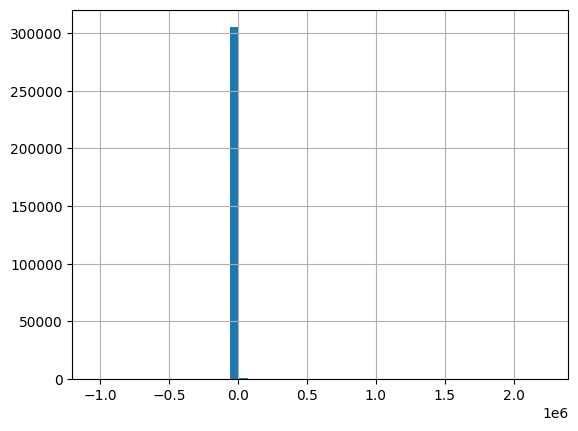

In [47]:
# check the distribution of this ratio

bureau_engineered['avg_ratio_bureau_cr_debt'].hist(bins=50)

### 12. AMT_CREDIT_SUM_LIMIT

Current credit limit of credit card reported in Credit Bureau

In [48]:
# check if for credit cards, this is the same as AMT_CREDIT_SUM?

df[df['AMT_CREDIT_SUM_LIMIT'] > 0][['AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM']]

,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM
5,108982.620,180000.0
20,228320.100,252000.0
21,411.615,0.0
75,121690.170,384750.0
87,137692.170,99000.0
...,...,...
1716311,10398.150,85950.0
1716324,10617.750,103500.0
1716351,112500.000,112500.0
1716375,135035.865,135000.0


- CREDIT_SUM is not the same as CREDIT_SUM_LIMIT, credit cards might be separately calculated
- but combined limits per client tells how much over credit is available to the client

### New feature #12: ttl_bureau_cc_limit

In [49]:
# total the AMT_CREDIT_SUM_LIMIT per client using groupby

total_bureau_cc_limit = pd.DataFrame(df.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].sum()).reset_index()
total_bureau_cc_limit.columns = ['SK_ID_CURR', 'ttl_bureau_cc_limit']

# add to engineered dataframe

bureau_engineered = pd.merge(bureau_engineered, total_bureau_cc_limit, on='SK_ID_CURR', how='outer')

# check the merged dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000,0,0.282517,0.000
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645,0,0.109236,31988.565
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000,0,0.000000,810000.000
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000,0,0.000000,0.000
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000,0,0.601246,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000,0,0.090594,0.000
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000,0,0.575078,58268.385
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000,0,0.299308,0.000
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000,0,0.000000,0.000


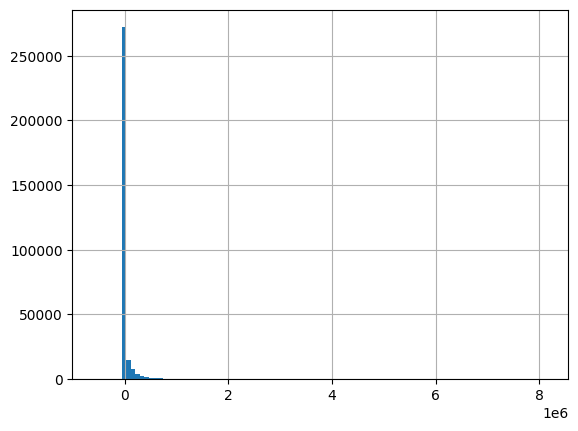

In [50]:
# check the distribution

bureau_engineered['ttl_bureau_cc_limit'].hist(bins=100);

### 13. AMT_CREDIT_SUM_OVERDUE

Current amount overdue on Credit Bureau credit

In [51]:
# check the values distribution

df['AMT_CREDIT_SUM_OVERDUE'].describe()

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

In [52]:
# check how many are greater than 0

df[df['AMT_CREDIT_SUM_OVERDUE'] > 0].count(0) / df.shape[0]

SK_ID_CURR                0.002422
SK_ID_BUREAU              0.002422
CREDIT_ACTIVE             0.002422
CREDIT_CURRENCY           0.002422
DAYS_CREDIT               0.002422
CREDIT_DAY_OVERDUE        0.002422
DAYS_CREDIT_ENDDATE       0.002254
DAYS_ENDDATE_FACT         0.000091
AMT_CREDIT_MAX_OVERDUE    0.000436
CNT_CREDIT_PROLONG        0.002422
AMT_CREDIT_SUM            0.002422
AMT_CREDIT_SUM_DEBT       0.002142
AMT_CREDIT_SUM_LIMIT      0.001410
AMT_CREDIT_SUM_OVERDUE    0.002422
CREDIT_TYPE               0.002422
DAYS_CREDIT_UPDATE        0.002422
AMT_ANNUITY               0.000673
Debt_Ratio                0.002142
dtype: float64

- Only 0.24% of the dataset in Bureau had an amount greater than 0

### New feature #13: ttl_bureau_credit_overdue

In [53]:
# group by client and get the total amount overdue

bureau_total_credit_overdue = pd.DataFrame(df.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum()).reset_index()

# rename the column names

bureau_total_credit_overdue.columns = ['SK_ID_CURR','ttl_bureau_credit_overdue']

# add to engineered features dataframe

bureau_engineered = pd.merge(bureau_engineered, bureau_total_credit_overdue, on='SK_ID_CURR', how='outer')

# check the merged dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000,0,0.282517,0.000,0.0
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645,0,0.109236,31988.565,0.0
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000,0,0.000000,810000.000,0.0
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000,0,0.000000,0.000,0.0
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000,0,0.601246,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000,0,0.090594,0.000,0.0
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000,0,0.575078,58268.385,0.0
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000,0,0.299308,0.000,0.0
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000,0,0.000000,0.000,0.0


<Axes: >

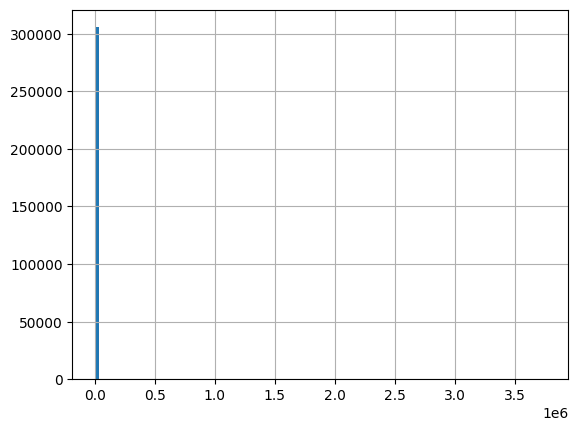

In [54]:
# check the values of the engineered feature

bureau_engineered['ttl_bureau_credit_overdue'].hist(bins=100)

### 14. CREDIT_TYPE

Type of Credit Bureau credit (Car, cash,...)

In [55]:
# check the values

df['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [56]:
# group the credit types into few categories: Consumer, Auto, Real Estate, Business, Investment and Other

df['CREDIT_TYPE_GROUPED'] = df['CREDIT_TYPE'].replace({
    'Consumer credit': 'Consumer',
    'Credit card': 'Consumer',
    'Microloan': 'Consumer',
    'Car loan': 'Auto',
    'Mortgage': 'Real Estate',
    'Real estate loan': 'Real Estate',
    'Loan for business development': 'Business',
    'Loan for working capital replenishment': 'Business',
    'Loan for the purchase of equipment': 'Business',
    'Loan for purchase of shares (margin lending)': 'Other',
    'Interbank credit': 'Other',
    'Mobile operator loan': 'Other',
    'Another type of loan': 'Other',
    'Unknown type of loan': 'Other',
    'Cash loan (non-earmarked)': 'Other'
})

In [57]:
# check the column's value counts

df['CREDIT_TYPE_GROUPED'].value_counts()

CREDIT_TYPE_GROUPED
Consumer       1666223
Auto             27690
Real Estate      18418
Business          2463
Other             1634
Name: count, dtype: int64

In [58]:
# convert it into dummy variables with a separate column for each credit type,
# 1 indicates which type it falls under

df = pd.get_dummies(df, columns=['CREDIT_TYPE_GROUPED'], prefix='bureau_type', dtype=int)

In [59]:
# check the updated dataframe

df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,Debt_Ratio,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Other,bureau_type_Real Estate
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,0.0,Consumer credit,-131,NaN,0.000000,0,0,1,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,0.0,Credit card,-20,NaN,0.761517,0,0,1,0,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,0.0,Consumer credit,-16,NaN,NaN,0,0,1,0,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,0.0,Credit card,-16,NaN,NaN,0,0,1,0,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,0.0,Consumer credit,-21,NaN,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,...,0.0,Microloan,-19,NaN,0.999911,0,0,1,0,0
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,...,0.0,Consumer credit,-2493,NaN,0.000000,0,0,1,0,0
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,...,0.0,Consumer credit,-967,NaN,NaN,0,0,1,0,0
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,...,0.0,Consumer credit,-1508,NaN,0.000000,0,0,1,0,0


### New features #14-18 bureau_type_Auto / Business / Consumer / Real Estate / Other

In [60]:
# use groupby to count the total number of credit records per client

bureau_engineered = pd.merge(bureau_engineered, df.groupby('SK_ID_CURR')['bureau_type_Auto'].sum(), on='SK_ID_CURR', how='outer')
bureau_engineered = pd.merge(bureau_engineered, df.groupby('SK_ID_CURR')['bureau_type_Business'].sum(), on='SK_ID_CURR', how='outer')
bureau_engineered = pd.merge(bureau_engineered, df.groupby('SK_ID_CURR')['bureau_type_Consumer'].sum(), on='SK_ID_CURR', how='outer')
bureau_engineered = pd.merge(bureau_engineered, df.groupby('SK_ID_CURR')['bureau_type_Real Estate'].sum(), on='SK_ID_CURR', how='outer')
bureau_engineered = pd.merge(bureau_engineered, df.groupby('SK_ID_CURR')['bureau_type_Other'].sum(), on='SK_ID_CURR', how='outer')

In [61]:
# check the updated dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Real Estate,bureau_type_Other
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000,0,0.282517,0.000,0.0,0,0,7,0,0
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645,0,0.109236,31988.565,0.0,0,0,8,0,0
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000,0,0.000000,810000.000,0.0,0,0,4,0,0
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000,0,0.000000,0.000,0.0,0,0,2,0,0
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000,0,0.601246,0.000,0.0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000,0,0.090594,0.000,0.0,0,0,12,0,1
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000,0,0.575078,58268.385,0.0,0,0,3,0,0
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000,0,0.299308,0.000,0.0,0,0,4,0,0
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000,0,0.000000,0.000,0.0,0,0,1,0,0


### 15. DAY_CREDIT_UPDATE

How many days before loan application did last information about the Credit Bureau credit come

In [62]:
# check the values

df['DAYS_CREDIT_UPDATE'].value_counts()

DAYS_CREDIT_UPDATE
-7        18503
-8        18462
-11       16975
-15       16870
-12       16827
          ...  
-41856        1
-41940        1
-2894         1
-2913         1
-2844         1
Name: count, Length: 2982, dtype: int64

In [63]:
# the relevancy of this data is not clear, drop feature

### 16. AMT_ANNUITY

Annuity of the Credit Bureau credit

<Axes: >

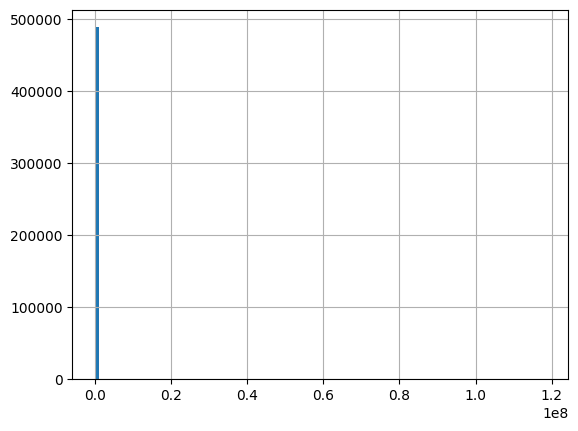

In [64]:
# check the value distribution

df['AMT_ANNUITY'].hist(bins=100)

- value from this feature can come from calculating the ratio of the annuity to the income of the applicant.

In [65]:
# get the total annuity per client, per active credit record
# step 1: narrow down the dataframe

df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)
active_credit_annuity = df[['SK_ID_CURR','CREDIT_ACTIVE','AMT_ANNUITY']].copy()
active_credit_annuity

,SK_ID_CURR,CREDIT_ACTIVE,AMT_ANNUITY
0,215354,Closed,0.0
1,215354,Active,0.0
2,215354,Active,0.0
3,215354,Active,0.0
4,215354,Active,0.0
...,...,...,...
1716423,259355,Active,0.0
1716424,100044,Closed,0.0
1716425,100044,Closed,0.0
1716426,246829,Closed,0.0


In [66]:
# step 2: filter by Active credit records only

active_credit_annuity = active_credit_annuity[active_credit_annuity['CREDIT_ACTIVE'] == 'Active'].copy()

active_credit_annuity

,SK_ID_CURR,CREDIT_ACTIVE,AMT_ANNUITY
1,215354,Active,0.0
2,215354,Active,0.0
3,215354,Active,0.0
4,215354,Active,0.0
5,215354,Active,0.0
...,...,...,...
1716404,166279,Active,0.0
1716410,280228,Active,0.0
1716412,288038,Active,0.0
1716417,433007,Active,0.0


### New feature #19. ttl_bureau_active_annuity

In [67]:
# step 3: group by client, then sum all the total annuities per client

current_ttl_annuity = active_credit_annuity.groupby('SK_ID_CURR').sum()
current_ttl_annuity.drop(columns='CREDIT_ACTIVE', inplace=True)
current_ttl_annuity = current_ttl_annuity.reset_index()
current_ttl_annuity.columns = ['SK_ID_CURR', 'ttl_bureau_active_annuity']

current_ttl_annuity


,SK_ID_CURR,ttl_bureau_active_annuity
0,100001,24817.500
1,100002,0.000
2,100003,0.000
3,100005,4261.500
4,100008,0.000
...,...,...
251810,456247,4329.000
251811,456249,0.000
251812,456250,79556.895
251813,456253,58369.500


In [68]:
# add new feature to engineered features dataframe

bureau_engineered = pd.merge(bureau_engineered, current_ttl_annuity, on='SK_ID_CURR', how='outer')

#fill na will 0, means no annuity
bureau_engineered['ttl_bureau_active_annuity'] = bureau_engineered['ttl_bureau_active_annuity'].fillna(0)

In [69]:
# check the final engineered features dataframe

bureau_engineered

,SK_ID_CURR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Real Estate,bureau_type_Other,ttl_bureau_active_annuity
0,100001,7,3.0,4.0,0.0,0.0,-49,0,82.428571,0.000,0,0.282517,0.000,0.0,0,0,7,0,0,24817.500
1,100002,8,2.0,6.0,0.0,0.0,-103,0,-349.000000,5043.645,0,0.109236,31988.565,0.0,0,0,8,0,0,0.000
2,100003,4,1.0,3.0,0.0,0.0,-606,0,-544.500000,0.000,0,0.000000,810000.000,0.0,0,0,4,0,0,0.000
3,100004,2,0.0,2.0,0.0,0.0,-408,0,-488.500000,0.000,0,0.000000,0.000,0.0,0,0,2,0,0,0.000
4,100005,3,2.0,1.0,0.0,0.0,-62,0,439.333333,0.000,0,0.601246,0.000,0.0,0,0,3,0,0,4261.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,2.0,11.0,0.0,0.0,-483,0,-1232.333333,18945.000,0,0.090594,0.000,0.0,0,0,12,0,1,0.000
305807,456250,3,2.0,1.0,0.0,0.0,-760,0,1288.333333,0.000,0,0.575078,58268.385,0.0,0,0,3,0,0,79556.895
305808,456253,4,2.0,2.0,0.0,0.0,-713,0,280.500000,0.000,0,0.299308,0.000,0.0,0,0,4,0,0,58369.500
305809,456254,1,0.0,1.0,0.0,0.0,-1104,0,-859.000000,0.000,0,0.000000,0.000,0.0,0,0,1,0,0,0.000


In [70]:
# check nulls and count

bureau_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_CURR                 305811 non-null  int64  
 1   num_bureau_records         305811 non-null  int64  
 2   num_active_bureau_credits  305811 non-null  float64
 3   num_closed_bureau_credits  305811 non-null  float64
 4   num_bad_bureau_credits     305811 non-null  float64
 5   num_sold_bureau_credits    305811 non-null  float64
 6   most_recent_bureau_apply   305811 non-null  int64  
 7   max_days_bureau_overdue    305811 non-null  int64  
 8   avg_bureau_credit_enddate  305811 non-null  float64
 9   max_bureau_overdue_amt     305811 non-null  float64
 10  ttl_cnt_bureau_prolong     305811 non-null  int64  
 11  avg_ratio_bureau_cr_debt   305811 non-null  float64
 12  ttl_bureau_cc_limit        305811 non-null  float64
 13  ttl_bureau_credit_overdue  30

In [71]:
# export to csv

# bureau_engineered.to_csv('../data/engineered_bureau.csv', index=False)